# Notebook for solving the movement of water through unsaturated Porous Medium
## Belowground solver of soil moisture state
## Part of CLiMA land surface model component


In [1]:
# Set The PATH Here!
#push!(LOAD_PATH, "/Users/ddutta/Dropbox/JULIA_Research/Soil_Moisture_Codes/PREDICTOR_CORRECTOR/RichardsEquation/")
#push!(LOAD_PATH, "/Users/debsunderdutta/Dropbox/JULIA_Research/Soil_Moisture_Codes/PREDICTOR_CORRECTOR/RichardsEquation/")

push!(LOAD_PATH,".")
# Include required libraries
using Plots
using Parameters
using Printf
using soil_moisture_V4

### Exploring $\theta-\psi$ and $K-\theta$ soil constitutive relationships
### The Campbell (1974) relationships are given by:
### $\frac{\theta}{\theta_{\text {sat}}}=\left(\frac{\psi}{\psi_{\text {sat}}}\right)^{-1 / b}
$;   $K=K_{\text { sat }}\left(\frac{\theta}{\theta_{\text { sat }}}\right)^{2 b+3}$;  $\frac{d \theta}{d \psi}=\frac{-\theta_{s a t}}{b \psi_{s a t}}\left(\frac{\psi}{\psi_{s a t}}\right)^{-1/b-1}$

### The van Genuchten (1980) relationships are given by:
### $S_{\mathrm{e}}=\frac{\theta-\theta_{\mathrm{res}}}{\theta_{\mathrm{sat}}-\theta_{\mathrm{res}}}=\left[\left|+(\alpha|\psi|)^{n}\right]^{-m}\right.$;  $m=1-1 / n$;
### $\mathrm{K}=K_{\text { sat }} S_{\mathrm{e}}^{1 / 2}\left[1-\left(1-S_{\mathrm{e}}^{1 / m}\right)^{m}\right]^{2}$;  $\frac{\mathrm{d} \theta}{d \psi}=\frac{\alpha m n\left(\theta_{\text {sat}}-\theta_{\text { res }}\right)(\alpha|\psi|)^{n-1}}{\left[ 1+(\alpha|\psi|)^{n}\right]^{m+1}}$
Pierre: I checked those equations and rderivatives - they are correct

In [17]:
# Generate a time series of matric potentials
suction1 = exp10.(range(-1.,stop=4.,length=100))*-1
#suction1=[0.1:10:10^3;]*-1

# Example from Bonan pg 119
# Berino loamy fine sand
ityp = 1;              # Soil texture flag
theta_res = 0.0286;    # Residual water content
theta_sat = 0.3658;    # Volumetric water content at saturation
vg_alpha = 0.028;      # Inverse of the air entry potential [/cm]
vg_n = 2.239;          # Pore-size distribution index
vg_m = 1-1/vg_n;       # Exponent
Ksat = 14.6 / 3600;      # Hydraulic conductivity at saturation [cm/s]
params = [theta_res theta_sat vg_alpha vg_n vg_m Ksat ityp]

# Some empty vectors
theta1 = []
K1     = []
cap1   = []
dtheta_dpsi1 = []
for i = 1:size(suction1)[1]
    theta, K, cap, dtheta_dpsi = van_Genuchten(params,suction1[i])
    #print(theta)
    theta1=vcat(theta1,theta)
    K1=vcat(K1,K)
    cap1=vcat(cap1,cap)
    dtheta_dpsi1=vcat(dtheta_dpsi1,dtheta_dpsi)
end

suction2 = exp10.(range(-1.,stop=4.,length=100))*-1
#suction2 = [0.1:10:10^3;]*-1
#suction2 = vcat(suctiona,suctionb)*-1

# Glendale slty clay loam
ityp = 1;               # Soil texture flag
theta_res = 0.106;      # Residual water content
theta_sat = 0.4686;     # Volumetric water content at saturation
vg_alpha = 0.0104;      # Inverse of the air entry potential [/cm]
vg_n = 1.3954;          # Pore-size distribution index
vg_m = 1-1/vg_n;        # Exponent
Ksat = 34 / 3600;       # Hydraulic conductivity at saturation [cm/s]
params = [theta_res theta_sat vg_alpha vg_n vg_m Ksat ityp]

# Some empty vectors
theta2   = []
K2       = []
cap2     = []
dtheta_dpsi2 = []
for i = 1:size(suction2)[1]
    theta, K, cap, dtheta_dpsi = van_Genuchten(params,suction2[i])
    #print(theta)
    theta2=vcat(theta2,theta)
    K2=vcat(K2,K)
    cap2=vcat(cap2,cap)
    dtheta_dpsi2=vcat(dtheta_dpsi2,dtheta_dpsi)
end


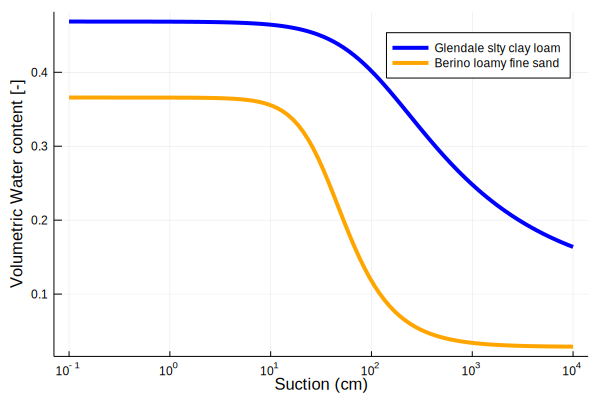

In [18]:
# Plot the Results
plot(suction2*-1,theta2,xaxis=:log,label="Glendale slty clay loam",color=:blue,line=(4),xlabel="Suction (cm)",ylabel="Volumetric Water content [-]")
plot!(suction1*-1,theta1,xaxis=:log,label="Berino loamy fine sand",color=:orange,line=(4))

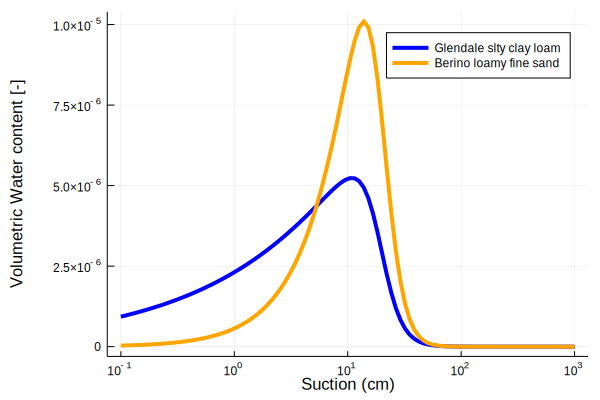

In [15]:
# Plot the Results
plot(suction2*-1,K2.*dtheta_dpsi2,xaxis=:log,label="Glendale slty clay loam",color=:blue,line=(4),xlabel="Suction (cm)",ylabel="Volumetric Water content [-]")
plot!(suction1*-1,K1.*dtheta_dpsi1,xaxis=:log,label="Berino loamy fine sand",color=:orange,line=(4))

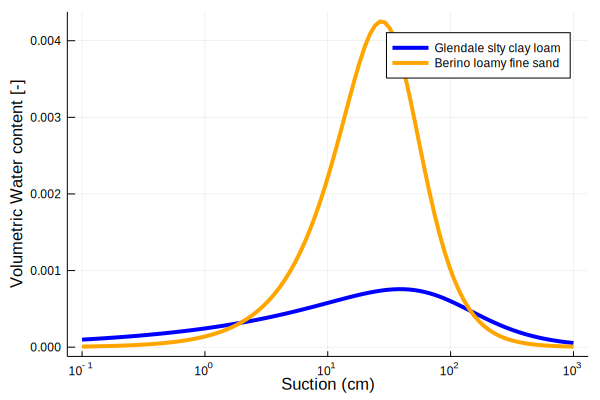

In [16]:
# Plot the Results
plot(suction2*-1,dtheta_dpsi2,xaxis=:log,label="Glendale slty clay loam",color=:blue,line=(4),xlabel="Suction (cm)",ylabel="Volumetric Water content [-]")
plot!(suction1*-1,dtheta_dpsi1,xaxis=:log,label="Berino loamy fine sand",color=:orange,line=(4))

In [7]:
# Example Using Bonan's Exanple Page 120
suction=[1:1:10^5;]*-1
# Loamy sand
# Campbell
ityp = 0;           # Soil texture flag
theta_sat = 0.410;  # Volumetric water content at saturation
psi_sat = -9.0;     # Matric potential at saturation [cm]
bc = 4.38;          # Exponent
Ksat = 56.28/3600;  # Hydraulic conductivity at saturation [cm/s]
params1 = [theta_sat psi_sat bc Ksat ityp]

# Van Genuchten
ityp = 0;              # Soil texture flag
theta_res = 0.057;     # Residual water content
theta_sat = 0.410;      # Volumetric water content at saturation
vg_alpha = 0.124;      # Inverse of the air entry potential [/cm]
vg_n = 2.28;           # Pore-size distribution index
vg_m = 1-1/vg_n;       # Exponent
Ksat = 14.6 / 3600;      # Hydraulic conductivity at saturation [cm/s]
params1v = [theta_res theta_sat vg_alpha vg_n vg_m Ksat ityp]


# Loam
# Campbell
ityp = 0;           # Soil texture flag
theta_sat = 0.451;  # Volumetric water content at saturation
psi_sat = -47.8;     # Matric potential at saturation [cm]
bc = 5.39;          # Exponent
Ksat = 2.5/3600;  # Hydraulic conductivity at saturation [cm/s]
params2 = [theta_sat psi_sat bc Ksat ityp]

# Van Genuchten
ityp = 0;              # Soil texture flag
theta_res = 0.078;     # Residual water content
theta_sat = 0.43;      # Volumetric water content at saturation
vg_alpha = 0.036;      # Inverse of the air entry potential [/cm]
vg_n = 1.56;           # Pore-size distribution index
vg_m = 1-1/vg_n;       # Exponent
Ksat = 1.04 / 3600;      # Hydraulic conductivity at saturation [cm/s]
params2v = [theta_res theta_sat vg_alpha vg_n vg_m Ksat ityp]

theta1 = []
K1     = []
theta1v = []
K1v     = []

theta2 = []
K2     = []
theta2v = []
K2v     = []
for i = 1:size(suction)[1]
    theta, K, cap, dtheta_dpsi = Campbell(params1,suction[i])
    theta1=vcat(theta1,theta)
    K1=vcat(K1,K)
    theta, K, cap, dtheta_dpsi = Campbell(params2,suction[i])
    theta2=vcat(theta2,theta)
    K2=vcat(K2,K)
    
    theta, K, cap, dtheta_dpsi = van_Genuchten(params1v,suction[i])
    theta1v=vcat(theta1v,theta)
    K1v=vcat(K1v,K)
    
    theta, K, cap, dtheta_dpsi = van_Genuchten(params2v,suction[i])
    theta2v=vcat(theta2v,theta)
    K2v=vcat(K2v,K)
end

BoundsError: BoundsError: attempt to access (0.41, 0.015633333333333332, 0)
  at index [4]

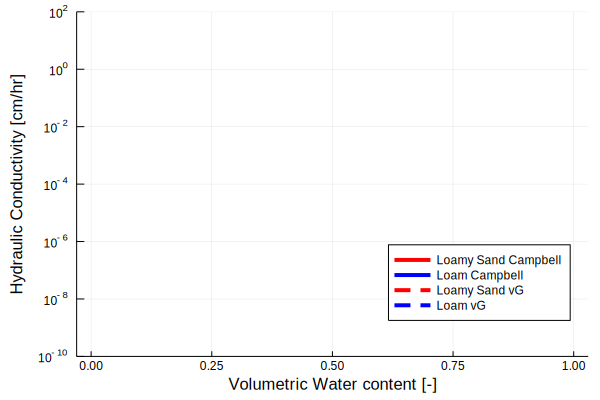

In [8]:
plot(theta1,K1*3600,yaxis=:log,label="Loamy Sand Campbell",color=:red,xlabel="Volumetric Water content [-]",ylabel="Hydraulic Conductivity [cm/hr]",line=(4))
plot!(theta2,K2*3600,yaxis=:log,label="Loam Campbell",color=:blue,ylims=(10^-10,10^2),line=(4))
plot!(theta1v,K1v*3600,yaxis=:log,label="Loamy Sand vG",color=:red,line=(:dash,4))
plot!(theta2v,K2v*3600,yaxis=:log,label="Loam vG",color=:blue,line=(:dash,4),legend=:bottomright)

In [6]:
# Plot the Results
plot(suction*-1,theta1,xaxis=:log,label="Loamy Sand Campbell",color=:red,line=(4),xlabel="Suction (cm)",ylabel="Volumetric Water content [-]")
plot!(suction*-1,theta2,xaxis=:log,label="Loam Campbell",color=:blue,line=(4))
plot!(suction*-1,theta1v,xaxis=:log,label="Loamy Sand vG",color=:red,line=(:dash,4))
plot!(suction*-1,theta2v,xaxis=:log,label="Loam vG",color=:blue,line=(:dash,4))

# Richard's Equation Solver
$$
\frac{\partial \theta}{\partial t}=\frac{\partial}{\partial z}\left[K(\theta) \frac{\partial \psi}{\partial z}\right]+\frac{\partial K}{\partial z}
$$

We will solve the head based form here:
$$
C(\psi) \frac{\partial \psi}{\partial t}=\frac{\partial}{\partial z}\left[K(\theta) \frac{\partial \psi}{\partial z}\right]+\frac{\partial K}{\partial z}
$$
For the solution we use a Finite Difference Scheme and more specifically an implicit time discretization is used where the spatial derivatives are written using a central difference scheme at time n+1 and a backward time difference approximation at time n+1.
The computational grid is as follows:
<img src="Compute_grid.png" style="width:400px;"/>
The finite difference approximation of the $\psi$ based form is as follows:
$$
\begin{array}{l}{-\frac{K_{i-1 / 2}^{n+1}}{\Delta z_{i-1 / 2}} \psi_{i-1}^{n+1}+\left(\frac{C_{i}^{n+1} \Delta z_{i}}{\Delta t}+\frac{K_{i-1 / 2}^{n+1}}{\Delta z_{i-1 / 2}}+\frac{K_{i+1 / 2}^{n+1}}{\Delta z_{i+1 / 2}}\right) \psi_{i}^{n+1}} \\ {-\frac{K_{i+1 / 2}^{n+1}}{\Delta z_{i+1 / 2}} \psi_{i+1}^{n+1}=\frac{C_{i}^{n+1} \Delta z_{i}}{\Delta t} \psi_{i}^{n}+K_{i-1 / 2}^{n+1}-K_{i+1 / 2}^{n+1}}\end{array}
$$

Boundary Conditions:
we specify $\psi_0$ at the top     (Dirichlet Boundary)

Free Drainage at bottom $Q_N=-K_N$ (Neumann Boundary)

Numerical Method used: Predictor Corrector - solves Richards equation twice. The predictor step is used to solve for $\psi$ over $(\Delta t/2)$ using K and C from time n, the Corrector step uses these to obtain $\psi$ over the full time step n.
The general form of the tridiagonal system of equations is:

$$
a_{i} \psi_{i-1}^{n+1}+b_{i} \psi_{i}^{n+1}+c_{i} \psi_{i+1}^{n+1}=d_{i}
$$

$$
\left[\begin{array}{cccccc}{b_{1}} & {c_{1}} & {0} & {0} & {0} & {0} \\ {a_{2}} & {b_{2}} & {c_{2}} & {0} & {0} & {0} \\ {0} & {a_{3}} & {b_{3}} & {c_{3}} & {0} & {0} \\ {0} & {0} & {\ddots} & {\ddots} & {\ddots} & {0} \\ {0} & {0} & {0} & {a_{N-1}} & {b_{N-1}} & {c_{N-1}} \\ {0} & {0} & {0} & {0} & {a_{N}} & {b_{N}}\end{array}\right] \times\left[\begin{array}{c}{\psi_{1}^{n+1}} \\ {\psi_{2}^{n+1}} \\ {\psi_{3}^{n+1}} \\ {\vdots} \\ {\psi_{N-1}^{n+1}} \\ {\psi_{N}^{n+1}}\end{array}\right]=\left[\begin{array}{c}{d_{1}} \\ {d_{2}} \\ {d_{3}} \\ {\vdots} \\ {d_{N-1}} \\ {d_{N}}\end{array}\right]
$$

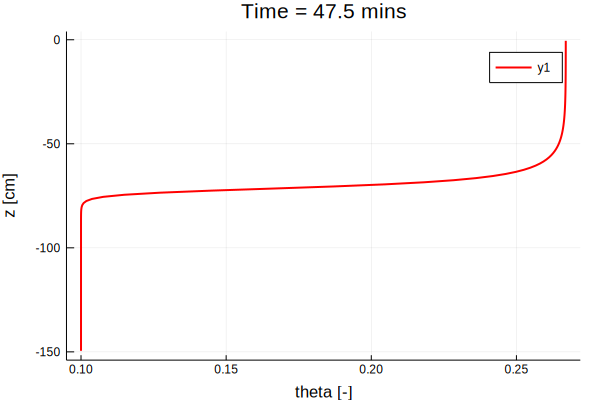

hour =    0.793 
hour =    0.794 
hour =    0.796 
hour =    0.797 
hour =    0.799 
hour =    0.800 


In [7]:
# ---------------------------------------------------------------------
# Use the predictor-corrector method to solve the Richards equation for
# infiltration with surface soil moisture as the boundary condition.
# ---------------------------------------------------------------------

global soil = soil_moisture_V4.soil_struct(nsoi=150) # Define the number of soil Layers

# Generate the Soil Compute Grid
soil = soil_moisture_V4.compute_grid_settings(soil)

# --- Soil parameters Settings
soil.ssflag    = 0 # Flag for Sink term
soil.functions = "van_Genuchten";  # Use van Genuchten relationships
#soil.functions = "Campbell";       # Use Campbell relationships

if soil.functions == "Campbell"

   # example from Hornberger & Wiberg [2005, Fig. 8.3]
   ityp = 0;              # Soil texture flag
   theta_sat = 0.25;      # Volumetric water content at saturation
   psi_sat = -25.0;       # Matric potential at saturation [cm]
   bc = 0.2;              # Exponent
   Ksat = 3.4e-03;        # Hydraulic conductivity at saturation [cm/s]
   params = [theta_sat psi_sat bc Ksat ityp]

elseif soil.functions == "van_Genuchten"

   # Haverkamp et al. (1977): sand
   ityp = 1;              # Soil texture flag
   theta_res = 0.075;     # Residual water content
   theta_sat = 0.287;     # Volumetric water content at saturation
   vg_alpha = 0.027;      # Inverse of the air entry potential [/cm]
   vg_n = 3.96;           # Pore-size distribution index
   vg_m = 1;              # Exponent
   Ksat = 34 / 3600;      # Hydraulic conductivity at saturation [cm/s]

#  # Haverkamp et al. (1977): Yolo light clay
#  ityp = 2;              # Soil texture flag
#  theta_res = 0.124;     # Residual water content
#  theta_sat = 0.495;     # Volumetric water content at saturation
#  vg_alpha = 0.026;      # Inverse of the air entry potential [/cm]
#  vg_n = 1.43;           # Pore-size distribution index
#  vg_m = 1 - 1 / vg_n;   # Exponent
#  Ksat = 0.0443 / 3600;  # Hydraulic conductivity at saturation [cm/s]

   params = [theta_res theta_sat vg_alpha vg_n vg_m Ksat ityp]
end

# --- Initial soil moisture & matric potential
for i = 1:soil.nsoi
   if (ityp == 0)
      soil.theta[i] = 0.10
   elseif ityp == 1
      soil.theta[i] = 0.10
   elseif ityp == 2
      soil.theta[i] = 0.24
   end
   soil.psi[i] = matric_potential(soil.functions, params, soil.theta[i])
end

global thetaini = copy(soil.theta)

# --- Surface boundary condition: saturation [minus some small delta]

soil.theta0 = theta_sat - 1.0e-03
if (ityp == 1)
   soil.theta0 = 0.267
end
soil.psi0 = matric_potential(soil.functions, params, soil.theta0)

# --- Time step [seconds]

dt = 10
if (ityp == 1)
   dt = 5
end

# --- Length of simulation [number of time steps]

# Hornberger & Wiberg: 15; 30; | 60 minutes
if (ityp == 0)
#  ntim = 15 * 60 / dt
#  ntim = 30 * 60 / dt
   ntim = 60 * 60 / dt
end

# Haverkamp et al. (1977) - sand: duration is in hours
if (ityp == 1)
#  ntim = 0.05 * 3600 / dt
#  ntim = 0.1 * 3600 / dt
#  ntim = 0.2 * 3600 / dt
#  ntim = 0.3 * 3600 / dt
# ntim = 0.4 * 3600 / dt
  ntim = 0.8 * 3600 / dt
end

# Haverkamp et al. (1977) - Yolo light clay: duration is in seconds
if (ityp == 2)
#  ntim = 1.0e4 / dt
#  ntim = 1.0e5 / dt
#  ntim = 5.0e5 / dt
   ntim = 1.0e6 / dt
end


# --- Initialize accumulators for water balance check
global sum_in    = 0
global sum_out   = 0
global sum_store = 0

global ET = 0.006

# --- Time stepping loop: NTIM iterations with a time step of DT seconds
# Initialize cumulative infiltration variables
xout = zeros(Int64.(ntim))
yout = zeros(Int64.(ntim))
for itim = 1:Int64.(ntim)

   # Hour of day

   hour = itim * (dt/86400 * 24)
   @printf("hour = %8.3f \n",hour)
    
#  # Add for fun variable Boundary Condition SURFACE DRYING
#     if itim > 100
#         soil.theta0 = theta_sat - 1.0e-03
#         if (ityp == 1)
#            soil.theta0 = 0.267 - (itim-200)*0.1/ntim
#         end
#         soil.psi0 = matric_potential(soil.functions, params, soil.theta0)
#     end


   # Calculate soil moisture
   soil = predictor_corrector(soil, params, ET, dt)


   # Sum fluxes for relative mass balance error()

   sum_in = sum_in + abs(soil.Q0) * dt
   sum_out = sum_out + abs(soil.QN) * dt
   sum_store = sum_store + soil.dtheta
    if itim%10 == 0
        IJulia.clear_output(true)
        Plots.display(plot(soil.theta,soil.z, color="red",line=2,xlabel = "theta [-]",ylabel = "z [cm]",title="Time = "*string(round(hour*60,digits=2))*" mins"))
        sleep(0.2)
    end
        
    #print(soil.sink)

   # cumulative infiltration
   xout[itim] = hour
   yout[itim] = sum_in

end

infiltration [cm] =   11.810 
drainage [cm] =    0.105 
storage [cm] =   11.705 
mass balance error (percent) =    0.003 


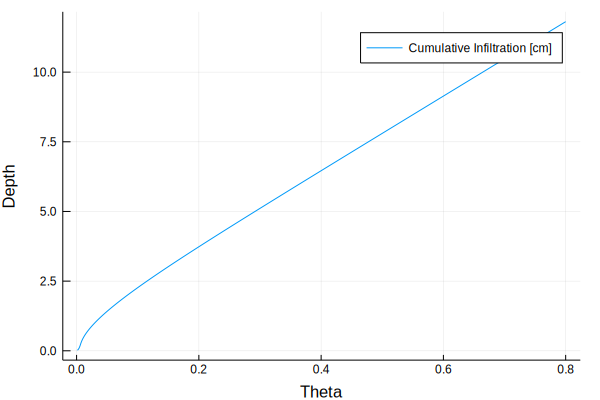

In [8]:
# Printing And Plotting
# --- Print mass balance()

@printf("infiltration [cm] = %8.3f \n",sum_in)
@printf("drainage [cm] = %8.3f \n",sum_out)
@printf("storage [cm] = %8.3f \n",sum_store)
relerr = ((sum_in - sum_out) - sum_store) / (sum_in - sum_out) * 100.0
@printf("mass balance error (percent) = %8.3f \n",relerr)

# Plot Cumulative Infiltration

plot(xout,yout,label="Cumulative Infiltration [cm]",xlabel="Theta",ylabel="Depth")


## Richards Equation with Sink Term
### This term accounts for Root uptake (extraction)

The head based form of the equation can be represented as:
$$
C(\psi) \frac{\partial \psi}{\partial t}=\frac{\partial}{\partial z}\left[K(\theta) \frac{\partial \psi}{\partial z}\right]+\frac{\partial K}{\partial z} - S_{w,i}
$$

Bonan's suggestion, partition the ET as per the following relationships.
$$
S_{w, i}=E\left(\Delta F_{i} \beta_{w, i} / \sum_{i=1}^{N} \Delta F_{i} \beta_{w, i}\right)
$$
which involves the root fraction and a soil wetness factor
$$
F(z)=1-\beta^{100 z}
$$

$$
\beta_{w, i}=\left\{\begin{array}{ll}{\frac{\psi_{i}-\psi_{d r y}}{\psi_{o p t}-\psi_{d r y}}} & {\psi_{i}>\psi_{d r y}} \\ {0} & {\psi_{i} \leq \psi_{d r y}}\end{array}\right.
$$



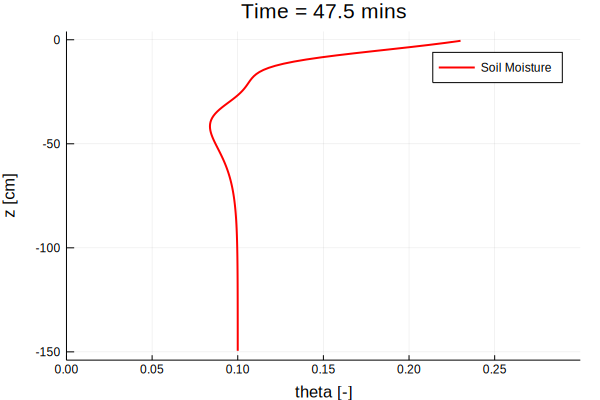

hour =    0.793 
hour =    0.794 
hour =    0.796 
hour =    0.797 
hour =    0.799 
hour =    0.800 


In [13]:
# ---------------------------------------------------------------------
# Use the predictor-corrector method to solve the Richards equation for
# infiltration with surface soil moisture as the boundary condition.
# ---------------------------------------------------------------------

global soil = soil_moisture_V4.soil_struct(nsoi=150) # Define the number of soil Layers

# Generate the Soil Compute Grid
soil = soil_moisture_V4.compute_grid_settings(soil)
soil.ssflag = 1 # Flag to compute the sink terms
root_frac   = 1 # Flag for the root fraction 1-Normal, 2-All at top funny, 3-Ridiculous

# Specify the ET
global ET = 0.005 # units are [cm/sec]
ET_flag   = 0     # 0 for constant ET 1 for a sinusoidal variation

# Some arbitrary values for computing the wetness factor
soil.psidry = -100
soil.psiopt = -10

# Compute some root fraction
if root_frac == 1
    soil.bi=0.92
    soil.fz=soil.fz*0

    soil.fz[1] = soil.bi^abs(soil.z[1])
    for i = 2:soil.nsoi
        soil.z[i] = 0.5 * (soil.z_plus_onehalf[i-1] + soil.z_plus_onehalf[i])

        # Assign the root fraction here
        soil.fz[i] = soil.bi^abs(soil.z[i])# if z is in cm
        print(soil.fz[i])
    end
elseif root_frac == 2
    soil.fz=soil.fz*0
    # Some sinusoidal shape
    x=range(0,stop=2*pi,length=20)
    y=sin.(x)
    soil.fz[1:20]=abs.(y)
    
elseif root_frac == 3
    soil.fz=soil.fz*0
    # Some sinusoidal shape
    x=range(0,stop=2*pi,length=20)
    y=sin.(x)
    soil.fz[1:20]=abs.(y)
    soil.fz[51:70]=abs.(y)*0.5
end

# --- Soil parameters Settings

soil.functions = "van_Genuchten";  # Use van Genuchten relationships
#soil.functions = "Campbell";       # Use Campbell relationships

if soil.functions == "Campbell"

   # example from Hornberger & Wiberg [2005, Fig. 8.3]
   ityp = 0;              # Soil texture flag
   theta_sat = 0.25;      # Volumetric water content at saturation
   psi_sat = -25.0;       # Matric potential at saturation [cm]
   bc = 0.2;              # Exponent
   Ksat = 3.4e-03;        # Hydraulic conductivity at saturation [cm/s]
   params = [theta_sat psi_sat bc Ksat ityp]

elseif soil.functions == "van_Genuchten"

   # Haverkamp et al. (1977): sand
   ityp = 1;              # Soil texture flag
   theta_res = 0.075;     # Residual water content
   theta_sat = 0.287;     # Volumetric water content at saturation
   vg_alpha = 0.027;      # Inverse of the air entry potential [/cm]
   vg_n = 3.96;           # Pore-size distribution index
   vg_m = 1;              # Exponent
   Ksat = 34 / 3600;      # Hydraulic conductivity at saturation [cm/s]

#  # Haverkamp et al. (1977): Yolo light clay
#  ityp = 2;              # Soil texture flag
#  theta_res = 0.124;     # Residual water content
#  theta_sat = 0.495;     # Volumetric water content at saturation
#  vg_alpha = 0.026;      # Inverse of the air entry potential [/cm]
#  vg_n = 1.43;           # Pore-size distribution index
#  vg_m = 1 - 1 / vg_n;   # Exponent
#  Ksat = 0.0443 / 3600;  # Hydraulic conductivity at saturation [cm/s]

   params = [theta_res theta_sat vg_alpha vg_n vg_m Ksat ityp]
end


# --- Initial soil moisture & matric potential
print("ok")
for i = 1:soil.nsoi
   if (ityp == 0)
      soil.theta[i] = 0.10
   elseif ityp == 1
      soil.theta[i] = 0.10
   elseif ityp == 2
      soil.theta[i] = 0.24
   end
   soil.psi[i] = matric_potential(soil.functions, params, soil.theta[i])
end

# --- Surface boundary condition: saturation [minus some small delta]

soil.theta0 = theta_sat - 1.0e-03
if (ityp == 1)
   soil.theta0 = 0.267
end
soil.psi0 = matric_potential(soil.functions, params, soil.theta0)

# --- Time step [seconds]

dt = 10
if (ityp == 1)
   dt = 5
end

# --- Length of simulation [number of time steps]

# Hornberger & Wiberg: 15; 30; | 60 minutes
if (ityp == 0)
   ntim = 60 * 60 / dt
end

# Haverkamp et al. (1977) - sand: duration is in hours
if (ityp == 1)
  ntim = 0.8 * 3600 / dt
end

# Haverkamp et al. (1977) - Yolo light clay: duration is in seconds
if (ityp == 2)
   ntim = 1.0e6 / dt
end


# --- Initialize accumulators for water balance check
global sum_in = 0
global sum_out = 0
global sum_tr = 0
global sum_store = 0

global theta_store = soil.theta # Store all SM Profiles

# --- Time stepping loop: NTIM iterations with a time step of DT seconds
xout = zeros(Int64.(ntim))
yout = zeros(Int64.(ntim))

if ET_flag == 1
    x=range(0,stop=pi,length=Int64.(ntim))
    y=sin.(x)
    ET_vary = y*ET
end
for itim = 1:Int64.(ntim)

   # Hour of day

   hour = itim * (dt/86400 * 24)
   @printf("hour = %8.3f \n",hour)
    
 # Add for fun variable Boundary Condition SURFACE DRYING
    if itim > 100
        soil.theta0 = theta_sat - 1.0e-03
        if (ityp == 1)
           soil.theta0 = 0.267 - (itim-200)*0.05/ntim
        end
        soil.psi0 = matric_potential(soil.functions, params, soil.theta0)
    end

   # Calculate soil moisture
    if ET_flag == 1
        ET = ET_vary[itim]
    end
   soil = predictor_corrector(soil, params, ET, dt)


   # Sum fluxes for relative mass balance error()

   sum_in = sum_in + abs(soil.Q0) * dt
   sum_out = sum_out + abs(soil.QN) * dt
   sum_tr = sum_tr + sum(soil.sink) * dt
   sum_store = sum_store + soil.dtheta
    theta_store=hcat(theta_store,soil.theta)
    if itim%10 == 0
        IJulia.clear_output(true)
        Plots.display(plot(soil.theta,soil.z, xlim=(0,0.3), color="red",label="Soil Moisture",line=2,xlabel = "theta [-]",ylabel = "z [cm]",title="Time = "*string(round(hour*60,digits=2))*" mins"))
        sleep(0.1)
    end
        
    #print(soil.sink)

   # cumulative infiltration
   xout[itim] = hour
   yout[itim] = sum_in

end

if ET_flag == 1
    plot(ET_vary,color="Blue",line=2,xlabel = "Time",ylabel = "ET [cm/sec]")
end

infiltration [cm] =   14.999 
drainage [cm] =    0.105 
storage [cm] =    0.505 
transpiration [cm] =   14.400 
mass balance error (percent) =   -2.270 


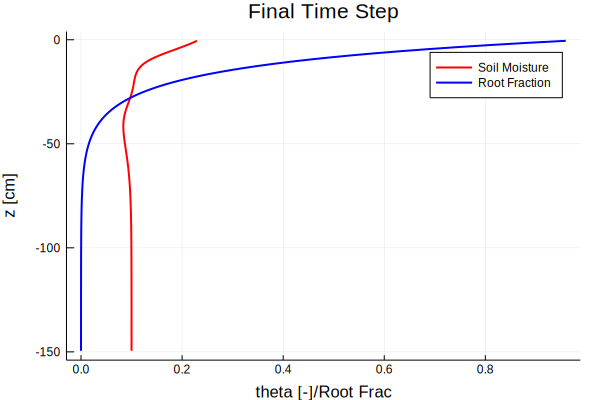

In [14]:
##### Printing And Plotting
# --- Print mass balance()

@printf("infiltration [cm] = %8.3f \n",sum_in)
@printf("drainage [cm] = %8.3f \n",sum_out)
@printf("storage [cm] = %8.3f \n",sum_store)
@printf("transpiration [cm] = %8.3f \n",sum_tr)
relerr = ((sum_in - sum_out - sum_tr) - sum_store) / (sum_in - sum_out - sum_tr) * 100.0
@printf("mass balance error (percent) = %8.3f \n",relerr)

# --- Graph data

plot(soil.theta,soil.z,color="red",label="Soil Moisture",line=2,xlabel = "theta [-]/Root Frac",ylabel = "z [cm]",title="Final Time Step")
plot!(soil.fz,soil.z,color="blue",label="Root Fraction",line=2)

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at none:0
└ @ Core none:0


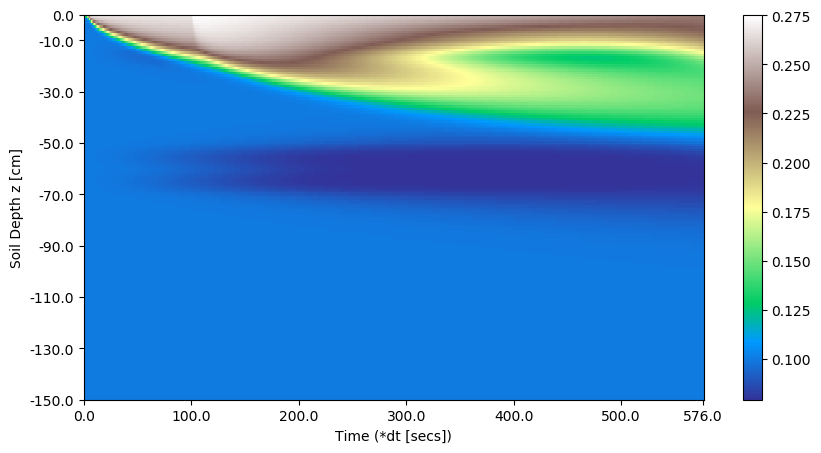

[0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 150.0]

In [11]:
using PyPlot
PyPlot.plt.figure(figsize=(10,5))
ax=PyPlot.pcolormesh(theta_store[end:-1:1,:],cmap="terrain") # nipy_spectral
PyPlot.plt.colorbar()
locs, labels = xticks()
locs[7] = ntim
xticks(locs,locs)
xlabel("Time (*dt [secs])")
locs, labels = yticks()
locs[9] = 150
locsy = locs.-150
yticks(locs,locsy)
ylabel("Soil Depth z [cm]")
print(locs)

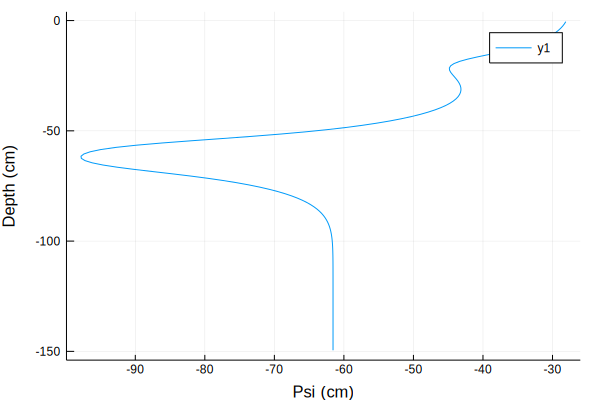

In [12]:
plot(xout,yout,label="Cumulative Plot",xlabel="Time",ylabel="Cumulative Infiltration")
plot(soil.psi,soil.z,xlabel="Psi (cm)",ylabel="Depth (cm)")